### IS4242 Group 8 Project

### Exploratory Data Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
plt.style.use('ggplot')
sns.set_theme()

In [2]:
# Constants

TARGET_VARS = ["hate", "privacy", "sexual", "impersonation", "illegal", "advertisement", "ai"]
RANDOM_STATE = 42

### Exploring the processed dataset

In [45]:
df = pd.read_csv('data/df_combined_processed_2023-03-30.csv')
df

,body,hate,privacy,sexual,impersonation,illegal,advertisement,ai
0,career career kalleron design refus collect re...,0,0,0,0,0,0,0
1,career career hotmeringue2880 hi econom gradua...,0,0,0,0,0,0,0
2,career career milenakowalska hey year finish b...,0,0,0,0,0,0,0
3,career career rstonerphd studi make employe wa...,0,0,0,0,0,1,0
4,career career temporarysection50 hi accept job...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
41198,you muthafin lie 8220lifeask 20pearl coreyeman...,1,0,0,0,0,0,0
41199,youv gone broke wrong heart babi drove redneck...,0,0,0,0,0,0,0
41200,young buck wanna eat dat nigguh like aint fuck...,1,0,0,0,0,0,0
41201,youu got wild bitch tellin lie,1,0,0,0,0,0,0


### Target Class Exploration

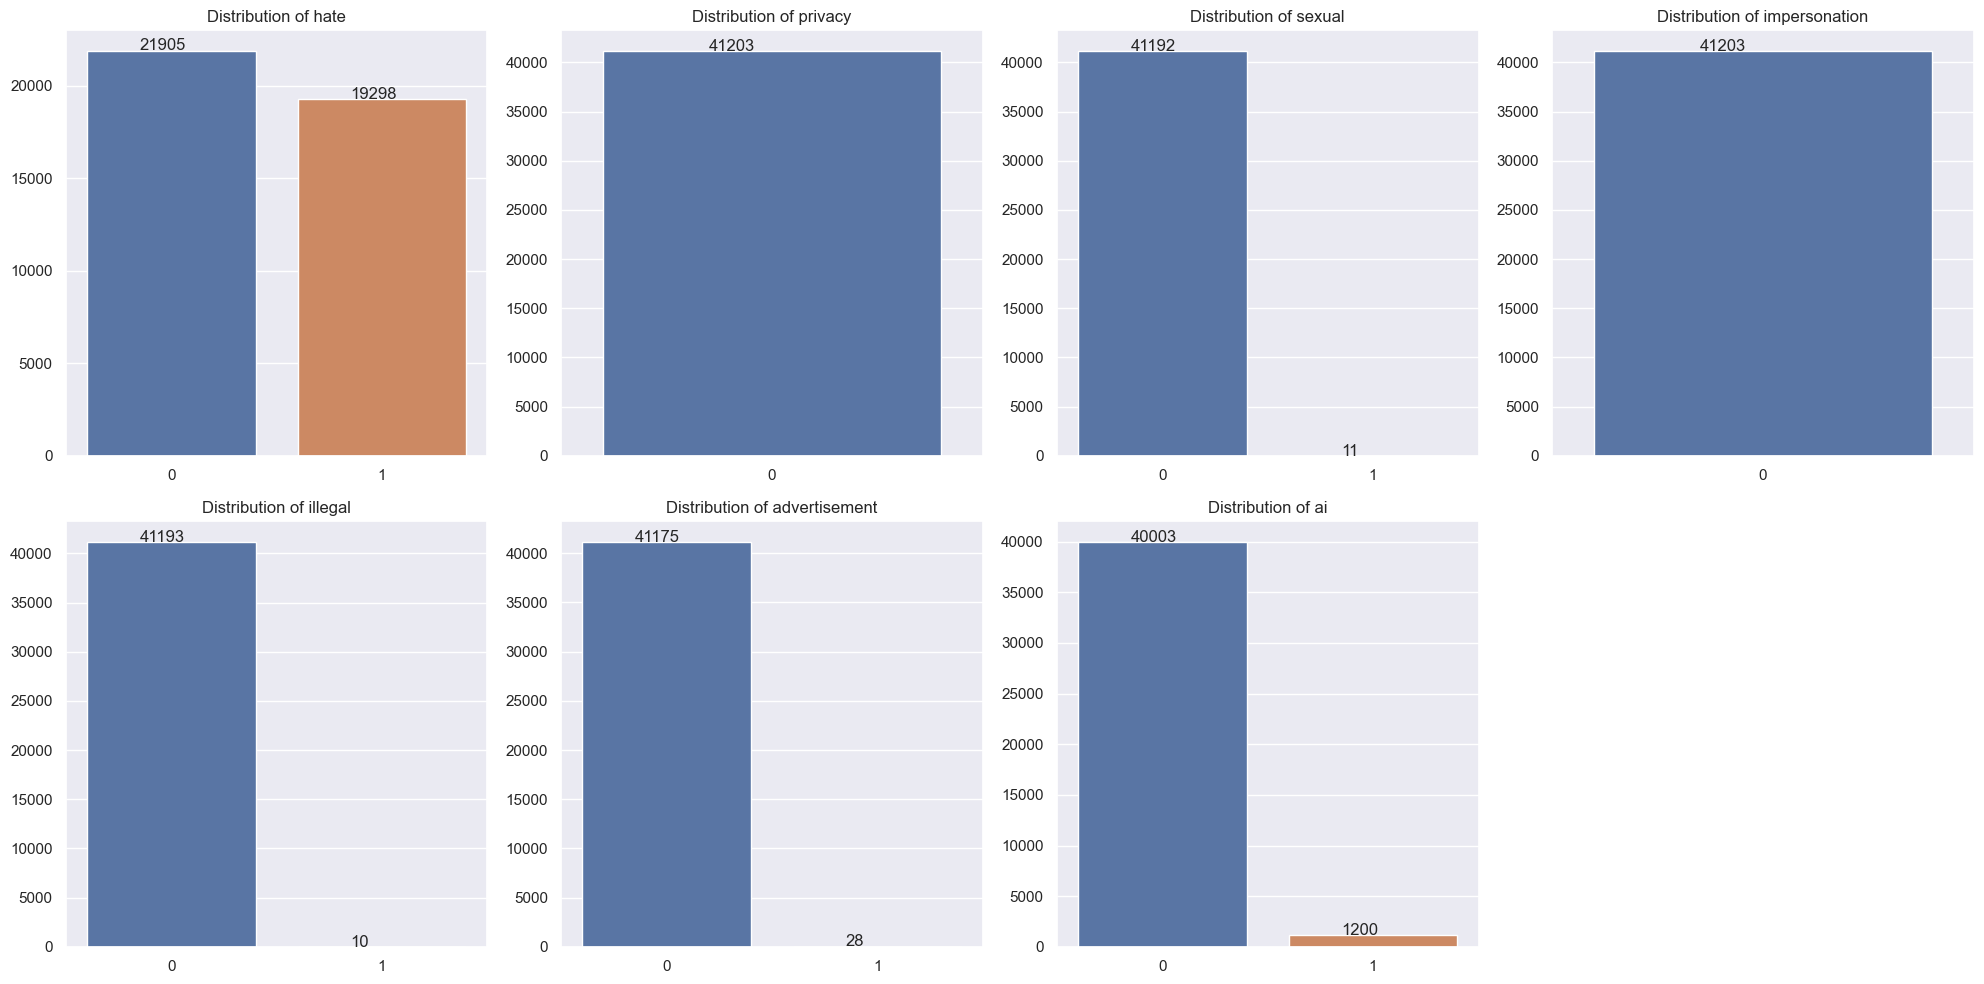

In [4]:
# Plotting the distribution of the target variables

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    if i < 7:
        sns.countplot(data=df, x=TARGET_VARS[i], ax=ax)
        ax.set_title(f'Distribution of {TARGET_VARS[i]}')
        ax.set_xlabel('')
        ax.set_ylabel('')
        # add counts to the bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.25, p.get_height()+13))

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### Textual Exploration

#### N-Gram Analysis

In [32]:
# Calculating frequencies of n-grams

def n_gram_frequencies(text, n):

    # Splitting text into words
    words = text.split()

    # Creating n-grams
    n_grams = zip(*[words[i:] for i in range(n)])

    # Calculating frequencies
    n_gram_freq = {}
    for n_gram in n_grams:
        n_gram = " ".join(n_gram)
        if n_gram in n_gram_freq:
            n_gram_freq[n_gram] += 1
        else:
            n_gram_freq[n_gram] = 1

    return n_gram_freq

def combine_n_gram_dicts_row_wise(n_gram_dict, combined_dict):
    for key, value in n_gram_dict.items():
        if key in combined_dict:
            combined_dict[key] += value
        else:
            combined_dict[key] = value
    return n_gram_dict

def convert_dict_to_df(word_frequencies):
    word_frequencies_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['Frequency'])
    word_frequencies_df = word_frequencies_df.sort_values(by='Frequency', ascending=False)
    return word_frequencies_df.reset_index().rename(columns={'index': 'Word'})

def generate_wordcloud_from_freq(word_frequencies):
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=word_frequencies)
    # Display the generated image:
    fig, ax = plt.subplots(figsize = (16, 20))
    ax.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [46]:
df["body"] = df["body"].apply(lambda x: x[3:])

In [47]:
for i in range(1,4):
    df[f"n-grams_{i}"] = df["body"].apply(lambda x: n_gram_frequencies(x, i))

N-gram for all data

In [48]:
all_data_1_gram = {}
all_data_2_gram = {}
all_data_3_gram = {}
df["n-grams_1"].apply(lambda x: combine_n_gram_dicts_row_wise(x, all_data_1_gram))
df["n-grams_2"].apply(lambda x: combine_n_gram_dicts_row_wise(x, all_data_2_gram))
df["n-grams_2"].apply(lambda x: combine_n_gram_dicts_row_wise(x, all_data_3_gram))


0        {'eer career': 1, 'career kalleron': 1, 'kalle...
1        {'eer career': 1, 'career hotmeringue2880': 1,...
2        {'eer career': 1, 'career milenakowalska': 1, ...
3        {'eer career': 1, 'career rstonerphd': 1, 'rst...
4        {'eer career': 1, 'career temporarysection50':...
                               ...                        
41198    {'muthafin lie': 1, 'lie 8220lifeask': 1, '822...
41199    {'v gone': 1, 'gone broke': 1, 'broke wrong': ...
41200    {'ng buck': 1, 'buck wanna': 1, 'wanna eat': 1...
41201    {'u got': 1, 'got wild': 1, 'wild bitch': 1, '...
41202    {'fl ntac': 1, 'ntac eileen': 1, 'eileen dahli...
Name: n-grams_2, Length: 41203, dtype: object

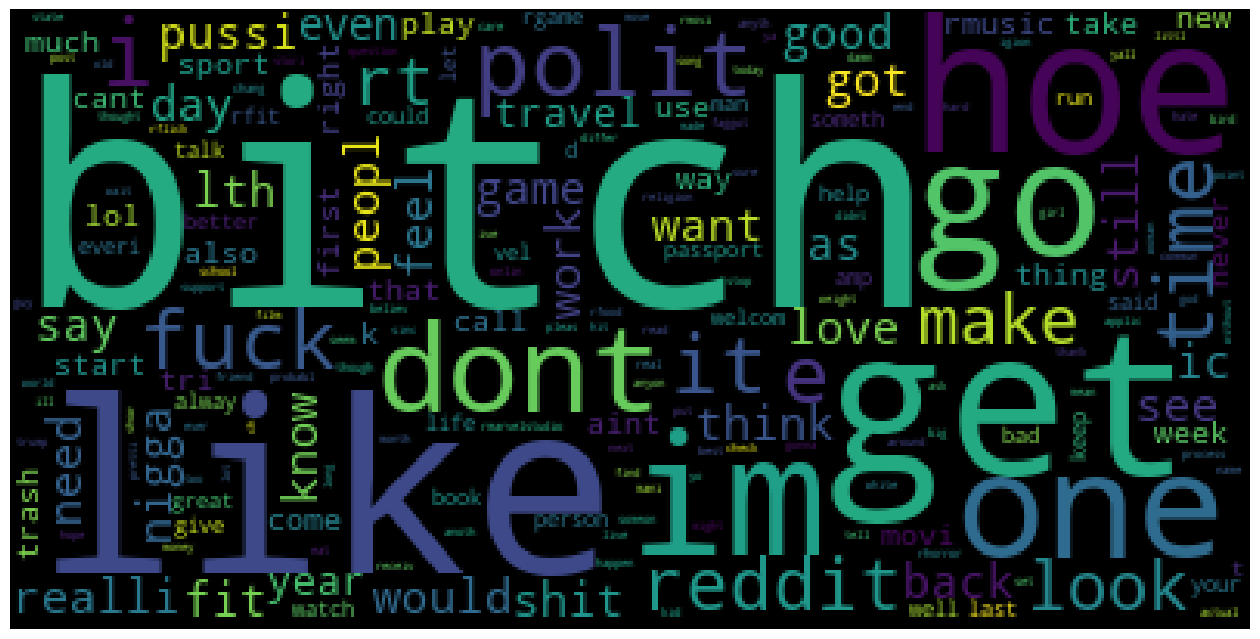

In [50]:
generate_wordcloud_from_freq(all_data_1_gram)

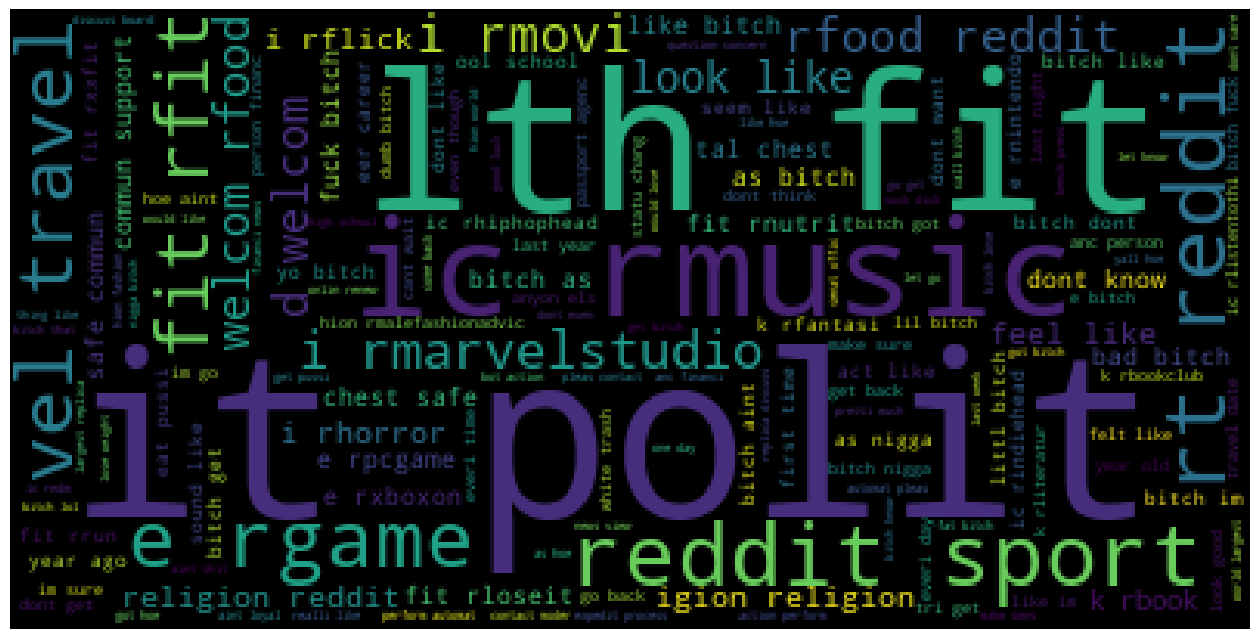

In [51]:
generate_wordcloud_from_freq(all_data_2_gram)

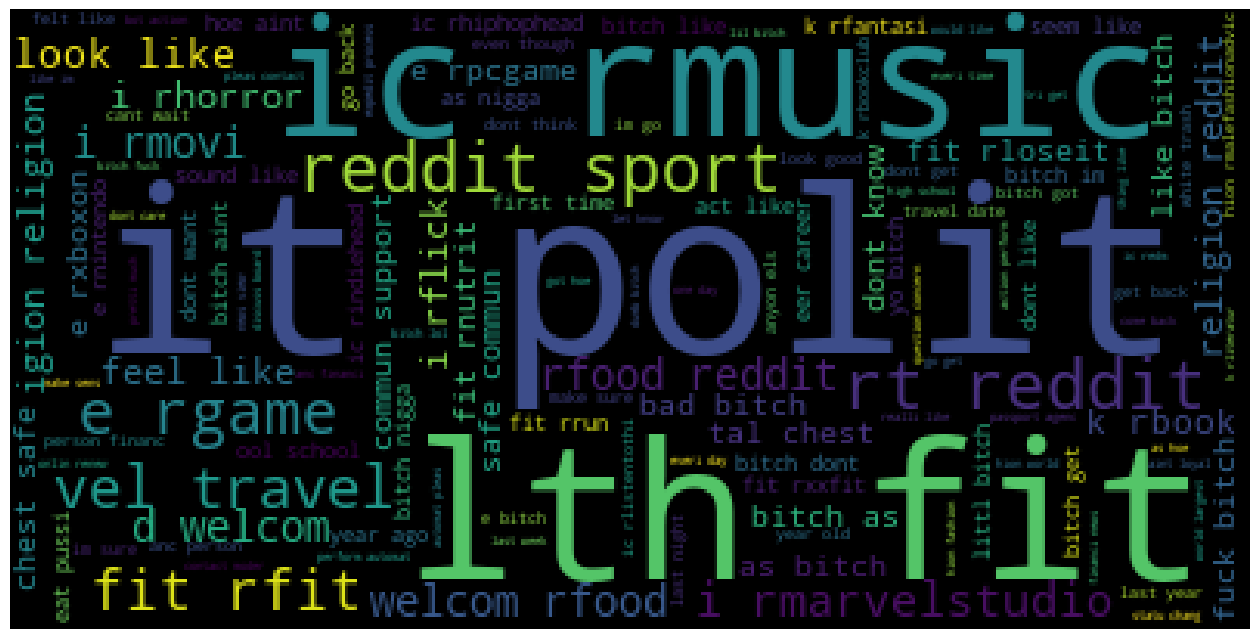

In [52]:
generate_wordcloud_from_freq(all_data_3_gram)

Overall

Group By Targets